In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imutils import paths
from PIL import Image
import cv2
import os
from TiffImageDataset import TiffImageDataset
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from torch.utils.data import DataLoader
from new_train_res2_unet import train, pretrained_train
from new_res2_unet import Res2_UNet, Bottle2neck


ORIGINAL DATASET

epoch: 20, val loss: 0.46224644937013326

epoch: 40, val loss: 0.41134440506759445

epoch: 60, val loss: 0.37403583448184163

In [9]:
TRAIN_IMAGES_IMPROVED_DATASET_PATH = (
    "../dataset/SatelliteImagesImproved/128x128_trainImage"
)
TEST_IMAGES_IMPROVED_DATASET_PATH = (
    "../dataset/SatelliteImagesImproved/128x128_testImage"
)

TRAIN_IMAGES_ORIGINAL_DATASET_PATH = (
    "../dataset/OriginalSatelliteImages/128x128_trainImage"
)
TEST_IMAGES_ORIGINAL_DATASET_PATH = (
    "../dataset/OriginalSatelliteImages/128x128_testImage"
)

TRAIN_MASKS_DATASET_PATH = "../dataset/Mask/128x128_trainGT"
TEST_MASKS_DATASET_PATH = "../dataset/Mask/128x128_GT"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PIN_MEMORY = True if DEVICE == "cuda" else False

In [10]:
trainImagePaths = sorted(list(paths.list_images(TRAIN_IMAGES_ORIGINAL_DATASET_PATH)))
# trainImagePaths = sorted(list(paths.list_images(TRAIN_IMAGES_IMPROVED_DATASET_PATH)))
trainMaskPaths = sorted(list(paths.list_images(TRAIN_MASKS_DATASET_PATH)))

testImagePaths = sorted(list(paths.list_images(TEST_IMAGES_ORIGINAL_DATASET_PATH)))
# testImagePaths = sorted(list(paths.list_images(TEST_IMAGES_IMPROVED_DATASET_PATH)))
testMaskPaths = sorted(list(paths.list_images(TEST_MASKS_DATASET_PATH)))


In [11]:
trainDS = TiffImageDataset(
    imagePaths=trainImagePaths[:2644], masksPaths=trainMaskPaths[:2644]
)
validationDS = TiffImageDataset(
    imagePaths=trainImagePaths[2644:], masksPaths=trainMaskPaths[2644:]
)
testDS = TiffImageDataset(imagePaths=testImagePaths, masksPaths=testMaskPaths)

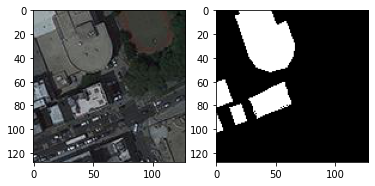

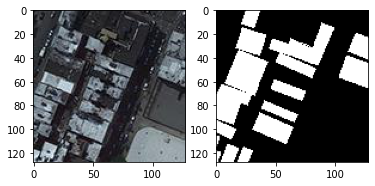

In [12]:
for _ in range(2):
    image, mask = validationDS.__getitem__(_)
    # plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image.permute(1, 2, 0))

    plt.subplot(1, 2, 2)
    plt.imshow(mask.permute(1, 2, 0), cmap="gray")

    plt.show()

In [5]:
trainLoader = DataLoader(
    trainDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)

validationLoader = DataLoader(
    validationDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)
# TEST DATA LOADER
testLoader = DataLoader(
    testDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)

In [6]:
pretrained_dict = torch.load("./outputs/orig_80_res2unet_final_model.pth")
pretrained_dict['epoch']

20

start training....


331it [02:35,  2.12it/s]
38it [00:05,  6.59it/s]


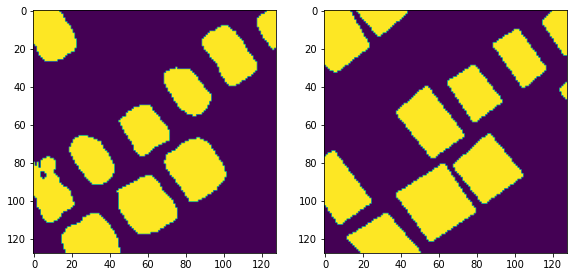

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 1.000000 train loss = 0.204554, epoch test loss = 0.408672, Time 00:02:45


331it [02:48,  1.97it/s]
38it [00:06,  6.05it/s]


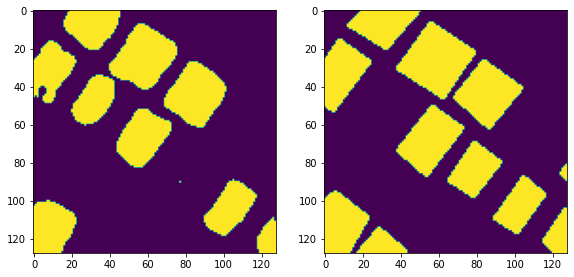

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 2.000000 train loss = 0.202144, epoch test loss = 0.462065, Time 00:03:00


331it [06:04,  1.10s/it]
38it [00:16,  2.37it/s]


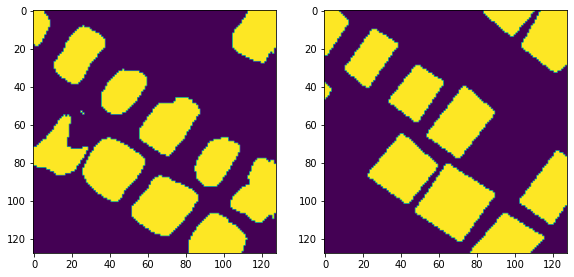

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 3.000000 train loss = 0.195504, epoch test loss = 0.445210, Time 00:06:25


331it [07:22,  1.34s/it]
38it [00:15,  2.39it/s]


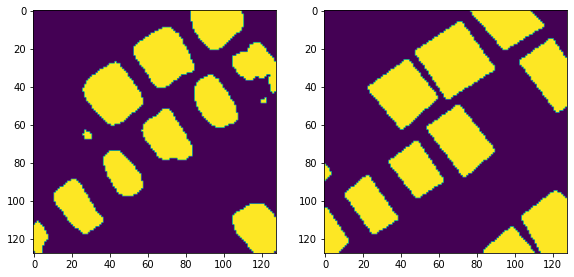

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 4.000000 train loss = 0.195461, epoch test loss = 0.465728, Time 00:07:42


331it [07:21,  1.34s/it]
38it [00:15,  2.38it/s]


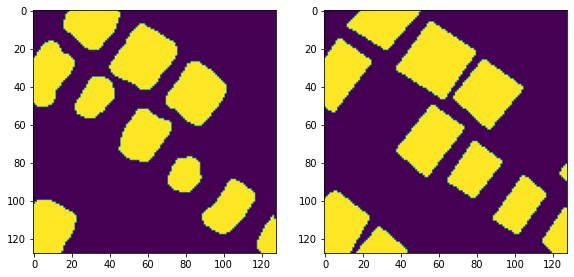

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 5.000000 train loss = 0.195378, epoch test loss = 0.438621, Time 00:07:41


331it [07:23,  1.34s/it]
38it [00:15,  2.38it/s]


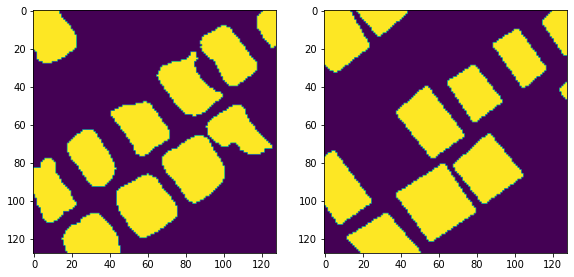

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 6.000000 train loss = 0.197256, epoch test loss = 0.487539, Time 00:07:42


331it [07:22,  1.34s/it]
38it [00:15,  2.38it/s]


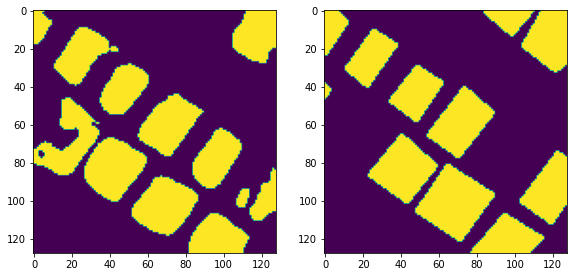

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 7.000000 train loss = 0.191849, epoch test loss = 0.467416, Time 00:07:41


331it [07:26,  1.35s/it]
38it [00:16,  2.36it/s]


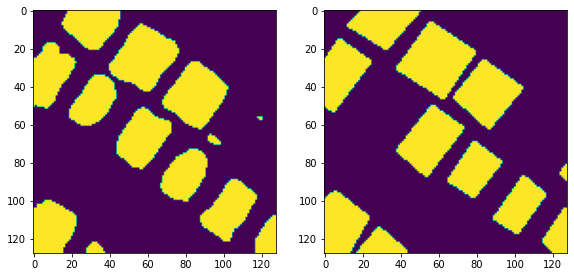

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 8.000000 train loss = 0.188057, epoch test loss = 0.478036, Time 00:07:46


331it [07:22,  1.34s/it]
38it [00:15,  2.39it/s]


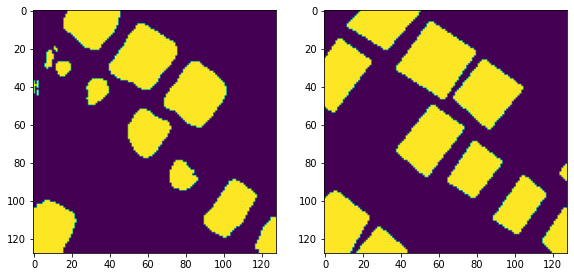

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 9.000000 train loss = 0.182622, epoch test loss = 0.475222, Time 00:07:41


331it [07:21,  1.33s/it]
38it [00:15,  2.41it/s]


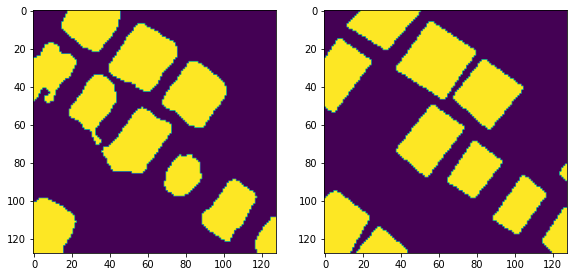

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 10.000000 train loss = 0.180708, epoch test loss = 0.484743, Time 00:07:41


331it [07:21,  1.33s/it]
38it [00:15,  2.38it/s]


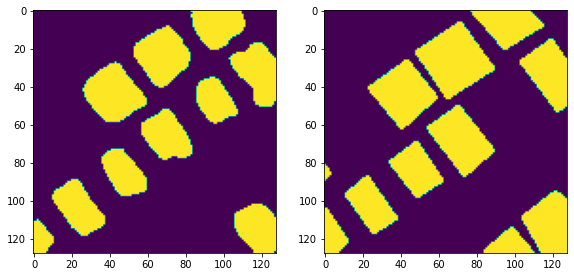

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 11.000000 train loss = 0.177844, epoch test loss = 0.488949, Time 00:07:40


331it [07:21,  1.33s/it]
38it [00:16,  2.34it/s]


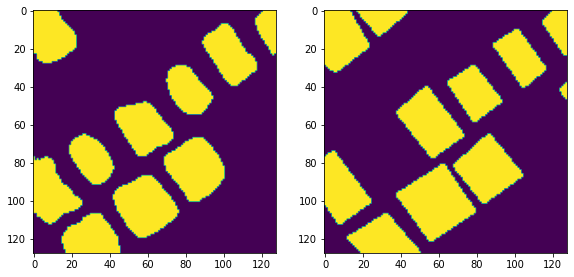

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 12.000000 train loss = 0.176681, epoch test loss = 0.666027, Time 00:07:41


331it [07:21,  1.33s/it]
38it [00:16,  2.35it/s]


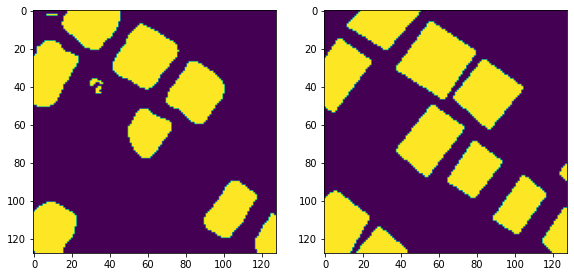

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 13.000000 train loss = 0.178852, epoch test loss = 0.517781, Time 00:07:41


331it [07:23,  1.34s/it]
38it [00:15,  2.39it/s]


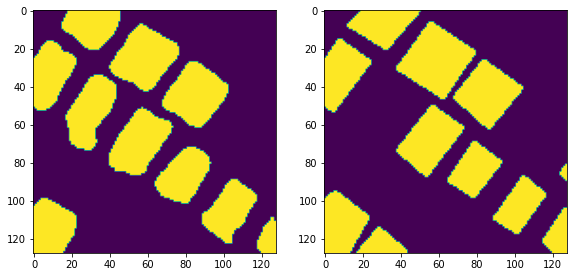

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 14.000000 train loss = 0.172862, epoch test loss = 0.486482, Time 00:07:43


331it [07:21,  1.33s/it]
38it [00:15,  2.39it/s]


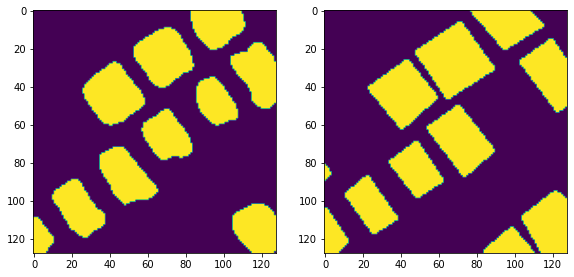

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 15.000000 train loss = 0.169825, epoch test loss = 0.500525, Time 00:07:41


331it [07:21,  1.33s/it]
38it [00:15,  2.39it/s]


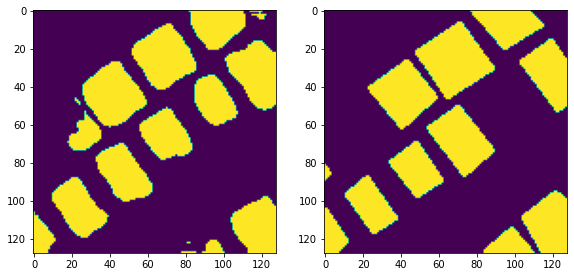

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 16.000000 train loss = 0.171528, epoch test loss = 0.493416, Time 00:07:40


331it [07:21,  1.33s/it]
38it [00:15,  2.40it/s]


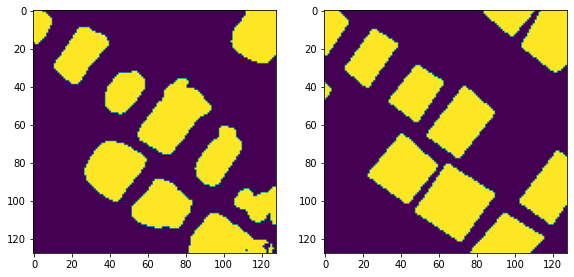

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 17.000000 train loss = 0.175027, epoch test loss = 0.490104, Time 00:07:41


331it [06:15,  1.13s/it]
38it [00:05,  6.72it/s]


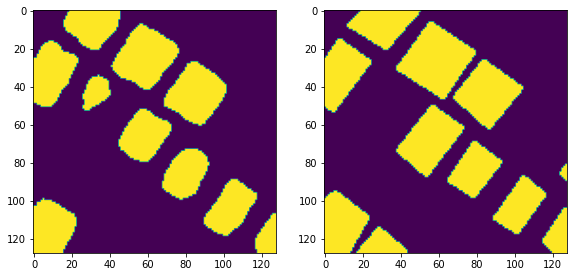

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 18.000000 train loss = 0.165101, epoch test loss = 0.479614, Time 00:06:25


331it [02:38,  2.09it/s]
38it [00:05,  6.43it/s]


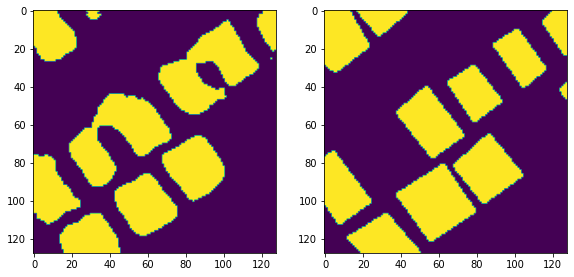

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 19.000000 train loss = 0.166917, epoch test loss = 0.582665, Time 00:02:49


331it [04:46,  1.16it/s]
38it [00:05,  7.05it/s]


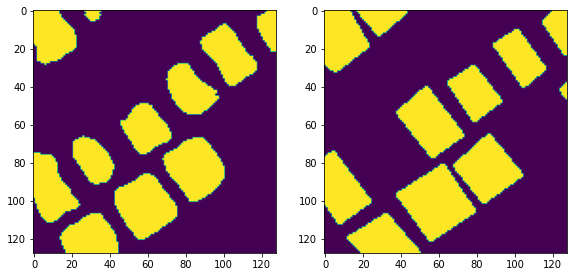

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 20.000000 train loss = 0.182114, epoch test loss = 0.472347, Time 00:04:56
Saving final model...


In [7]:
new_trained_model = pretrained_train(
    train_dataloader=trainLoader,
    eval_dataloader=validationLoader,
    pretrained_dict=pretrained_dict,
    last_eval_loss=0.37403583448184163,
    show_visuals=True,
    epo_num=20,
)

In [13]:
test_masks_list = []
test_images_list = []
test_count = len(testDS.masksPaths)

# add test images and masks into respective lists
for i in range(test_count):
    image, mask = testDS.__getitem__(i)
    test_masks_list.append(mask.int().detach().numpy())
    test_images_list.append(image.detach().numpy())

# Generate np.array and torch.tensor from those lists
test_masks_np = np.array(test_masks_list)
test_masks_np = test_masks_np.astype("int8")

test_images_np = np.array(test_images_list)

test_images_torch = torch.from_numpy(test_images_np).cuda()
test_masks_torch = torch.from_numpy(test_masks_np).cuda()

In [45]:
def retrieve_saved_model():
    model = Res2_UNet(Bottle2neck, [3, 4, 6, 3], baseWidth=26, scale=4)
    # pretrained_dict = torch.load("../res2unet_best_model.pth")
    pretrained_dict = torch.load("./outputs/orig_100_res2unet_final_model.pth")
    print(pretrained_dict['epoch'])
    # pretrained_dict = torch.load("./outputs/res2unet_best_model.pth")
    net_dict = model.state_dict()
    ### pretrained_dict = {k: v for k, v in pretrained_dict.items() if (k in net_dict)}

    pretrained_dict = {
        # k: v for k, v in pretrained_dict.model_state_dict().items() if (k in net_dict)
        k: v
        for k, v in pretrained_dict["model_state_dict"].items()
        if (k in net_dict)
    }

    # print(pretrained_dict)
    net_dict.update(pretrained_dict)
    model.load_state_dict(net_dict)
    model.eval()
    return model


In [46]:
saved_model = retrieve_saved_model()

20


In [47]:
test_pred_list = []
with torch.no_grad():
    for test_image in test_images_torch:
        test_image = test_image.unsqueeze(0).cpu()
        output = saved_model(test_image)
        # output = trained_model(test_image)
        output = torch.sigmoid(output)
        test_pred_list.append(output[0])

# convert into numpy array
test_pred_np = np.array([t.cpu().numpy() for t in test_pred_list])

# flattened into single dimension array
flattened_pred = test_pred_np.flatten()
flattened_masks = test_masks_np.flatten()


In [48]:
def visualise_model_pred(index):
    image, mask = testDS.__getitem__(index)
    image = image.unsqueeze(0).cpu()

    pred = saved_model(image)
    pred = torch.sigmoid(pred)

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image[0].permute(1, 2, 0))

    plt.subplot(1, 3, 2)
    plt.imshow(mask.permute(1, 2, 0)[:, :, 0])

    plt.subplot(1, 3, 3)
    plt.imshow(pred[0].permute(1, 2, 0).detach().numpy() > 0.5)
    plt.show()


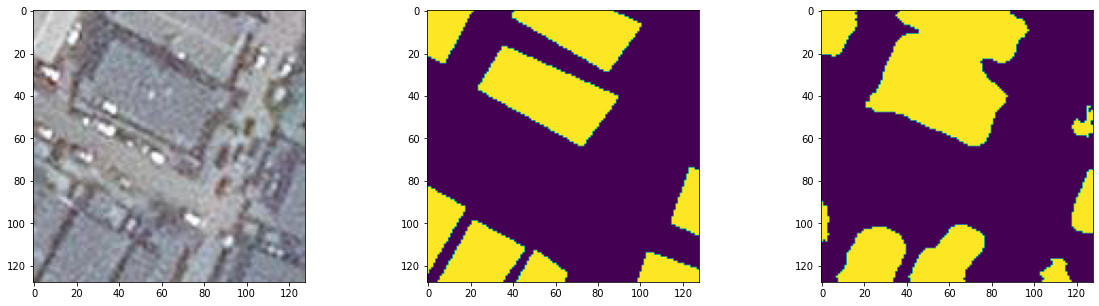

In [49]:
visualise_model_pred(10)

In [50]:
def IoU(threshold, Yi, y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum((Yi == c) & (y_predi == c))
        FP = np.sum((Yi != c) & (y_predi == c))
        FN = np.sum((Yi == c) & (y_predi != c))
        IoU = TP / float(TP + FP + FN)
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    return mIoU


In [51]:
from tqdm import tqdm

ious = []
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for i in tqdm(np.arange(0.10, 1.0, 0.01)):
    preds_val_t = (flattened_pred > i).astype(np.uint8)
    preds_val_tt = preds_val_t.flatten()
    iou_val = IoU(i, flattened_masks, preds_val_tt)
    ious.append(iou_val)

    # f1_score_val = f1_score(flattened_masks, preds_val_tt)
    # f1_scores.append(f1_score_val)

    accuracy_score_val = accuracy_score(flattened_masks, preds_val_tt)
    accuracy_scores.append(accuracy_score_val)

    # precision_score_val = precision_score(flattened_masks, preds_val_tt)
    # precision_scores.append(precision_score_val)

    # recall_score_val = recall_score(flattened_masks, preds_val_tt)
    # recall_scores.append(recall_score_val)


100%|██████████| 90/90 [00:37<00:00,  2.39it/s]


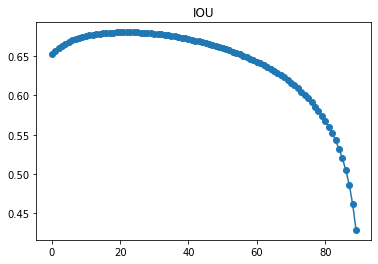

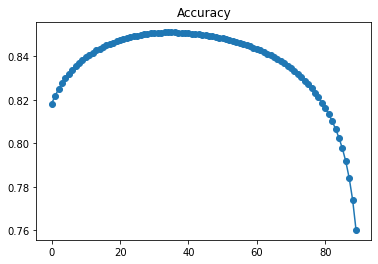

In [52]:
plt.plot(ious, "-o")
plt.title("IOU")
plt.show()

plt.plot(accuracy_scores, "-o")
plt.title("Accuracy")
plt.show()

In [53]:
metrics = pd.DataFrame(
    columns=[
        "Threshold",
        "IoU",
        "Accuracy",
    ]
)
# "F1 score", "Precision", "Recall"
metrics["IoU"] = pd.Series(ious)
metrics["Accuracy"] = pd.Series(accuracy_scores)
# metrics['F1 score'] = pd.Series(f1_scores)
# metrics['Precision'] = pd.Series(precision_scores)
# metrics['Recall'] = pd.Series(recall_scores)

metrics.Threshold = pd.Series(np.arange(0.10, 1.0, 0.01))

In [54]:
metrics.iloc[:,1:].max()        # 100 epoch 

IoU         0.680681
Accuracy    0.851097
dtype: float64